# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#List of city data
city_data = []

print("Beginning Data Retrieval     ")
print("----------------------------")

city_clouds = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lng = []
city_max_temp = []
city_wind = []

# Create Counter 
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities): 
    
    #append api data into lists
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_data.append(response["name"])
        city_clouds.append(response["clouds"]["all"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_humidity.append(response["main"]["humidity"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_wind.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Add to counter
        record = record + 1
        
    # Skip if no match found
    except:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather = {
    "city": city_data,
    "cloudiness":city_clouds, 
    "country":city_country,
    "date":city_date, 
    "humidity": city_humidity,
    "latitude":city_lat, 
    "longitude":city_lng, 
    "max_temperature": city_max_temp,
    "wind_speed":city_wind
}

# turn dictionary into df
df = pd.DataFrame(weather)

df.count()

city               551
cloudiness         551
country            551
date               551
humidity           551
latitude           551
longitude          551
max_temperature    551
wind_speed         551
dtype: int64

In [20]:
df.to_csv('weather_df.csv')

df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,max_temperature,wind_speed
0,Mehamn,75,NO,1573717224,80,71.03,27.85,35.60,9.17
1,Batemans Bay,33,AU,1573717312,62,-35.71,150.18,59.04,4.18
2,Port Alfred,75,ZA,1573717224,67,-33.59,26.89,70.29,19.13
3,Ushuaia,75,AR,1573717175,100,-54.81,-68.31,42.80,9.17
4,Nanortalik,100,GL,1573717313,80,60.14,-45.24,40.08,28.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

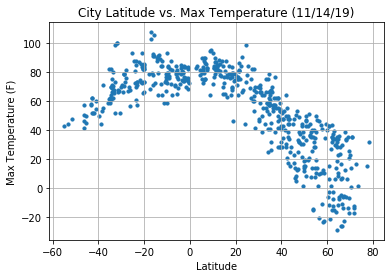

In [27]:
plt.scatter(df["latitude"], df["max_temperature"], marker="o", alpha=1, s=10)

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

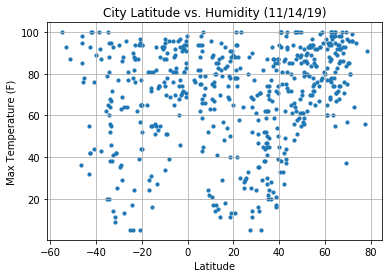

In [30]:
plt.scatter(df["latitude"], df["humidity"], marker="o", alpha=1, s=10)

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

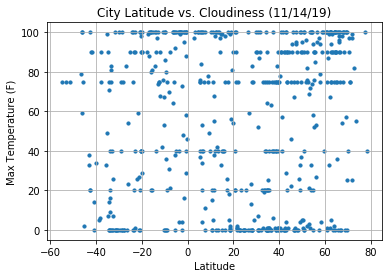

In [32]:
plt.scatter(df["latitude"], df["cloudiness"], marker="o", alpha=1, s=10)

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

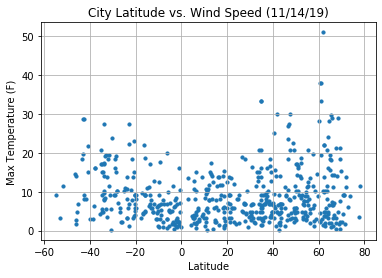

In [33]:
plt.scatter(df["latitude"], df["wind_speed"], marker="o", alpha=1, s=10)

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Show plot
plt.show()